15


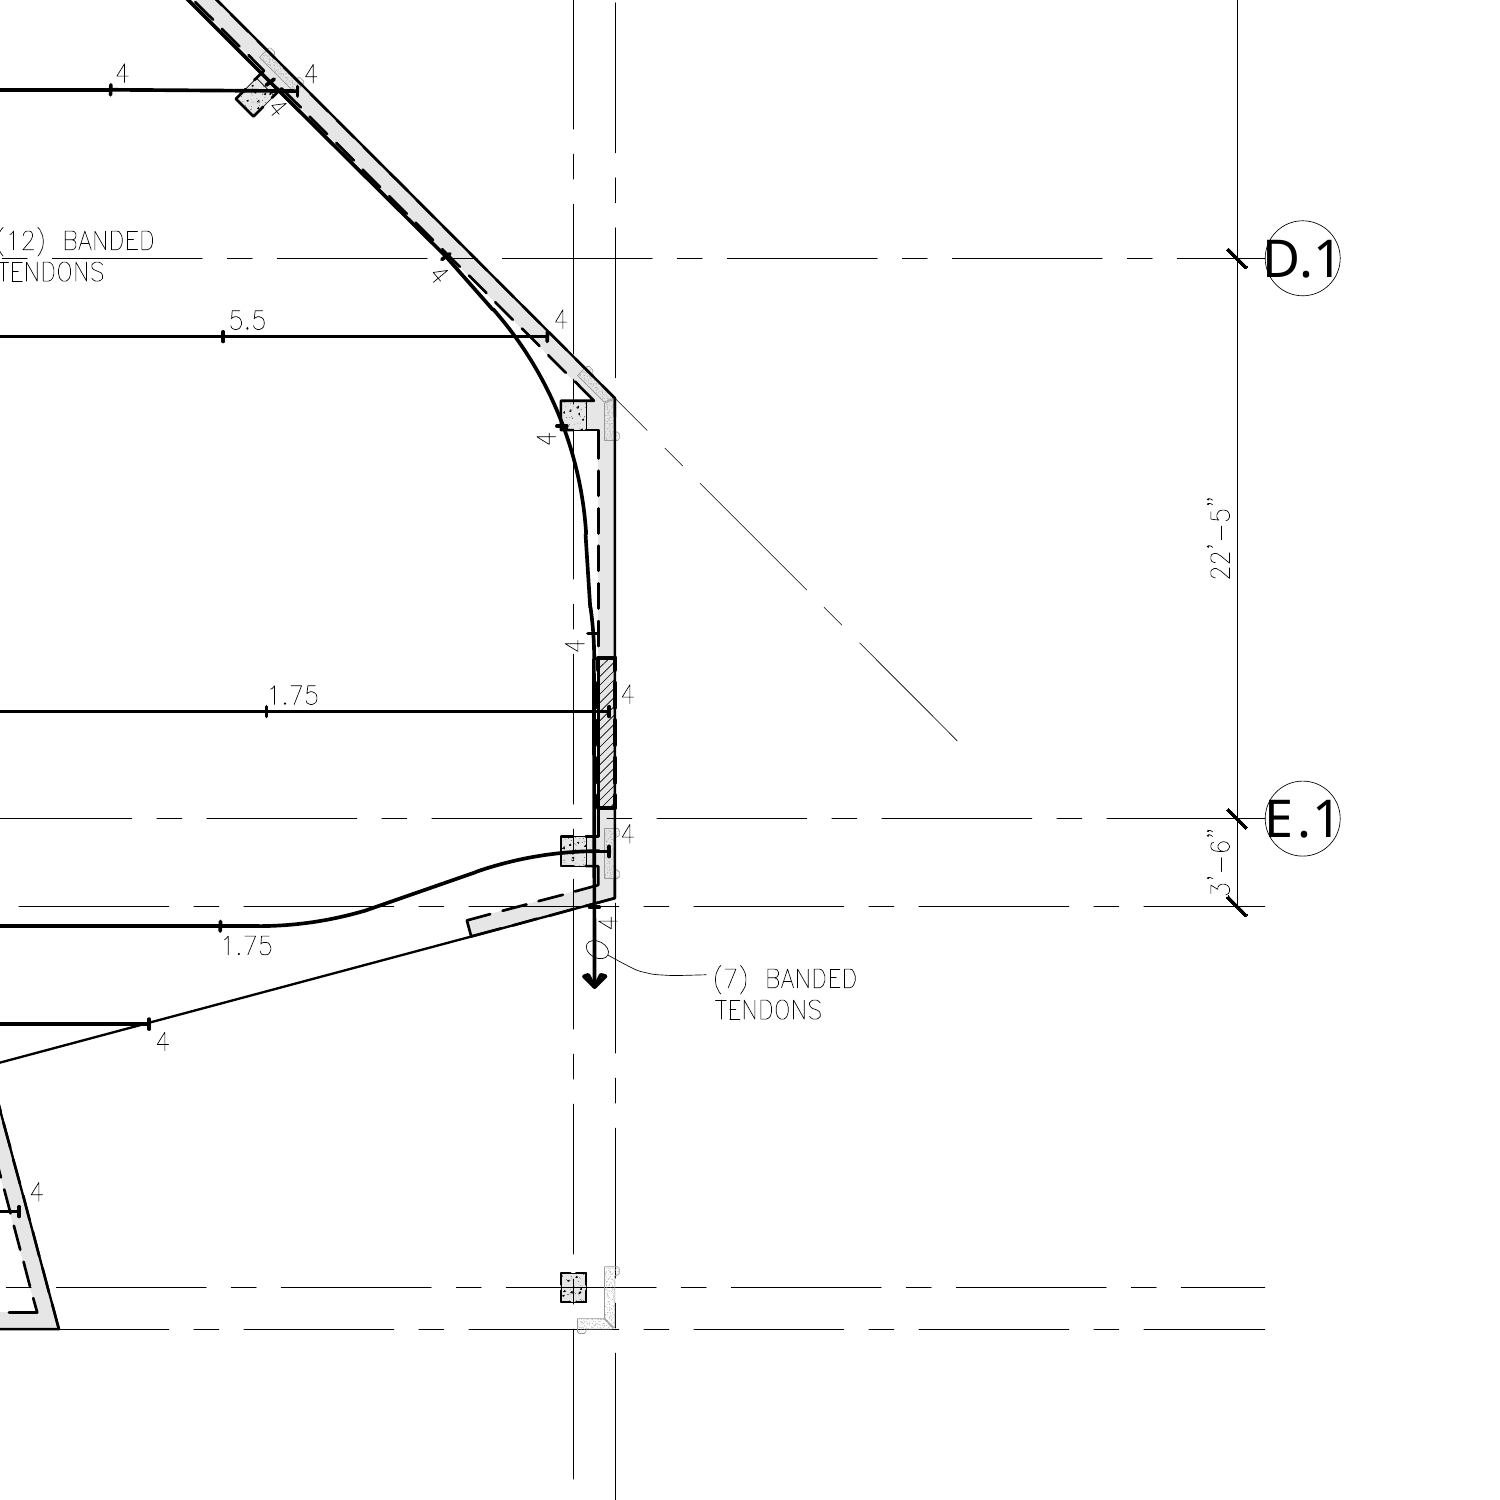

In [1]:
from ocr.line_detector import tile_image
import numpy as np
from PIL import Image
import cv2

img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/original.png")
height, width = img.shape[:2]
tiles = tile_image(img)

# tile = img[1000:2000, 2500:4000].copy()
tile = tiles[14][0].copy()
print(len(tiles))
Image.fromarray(tile)

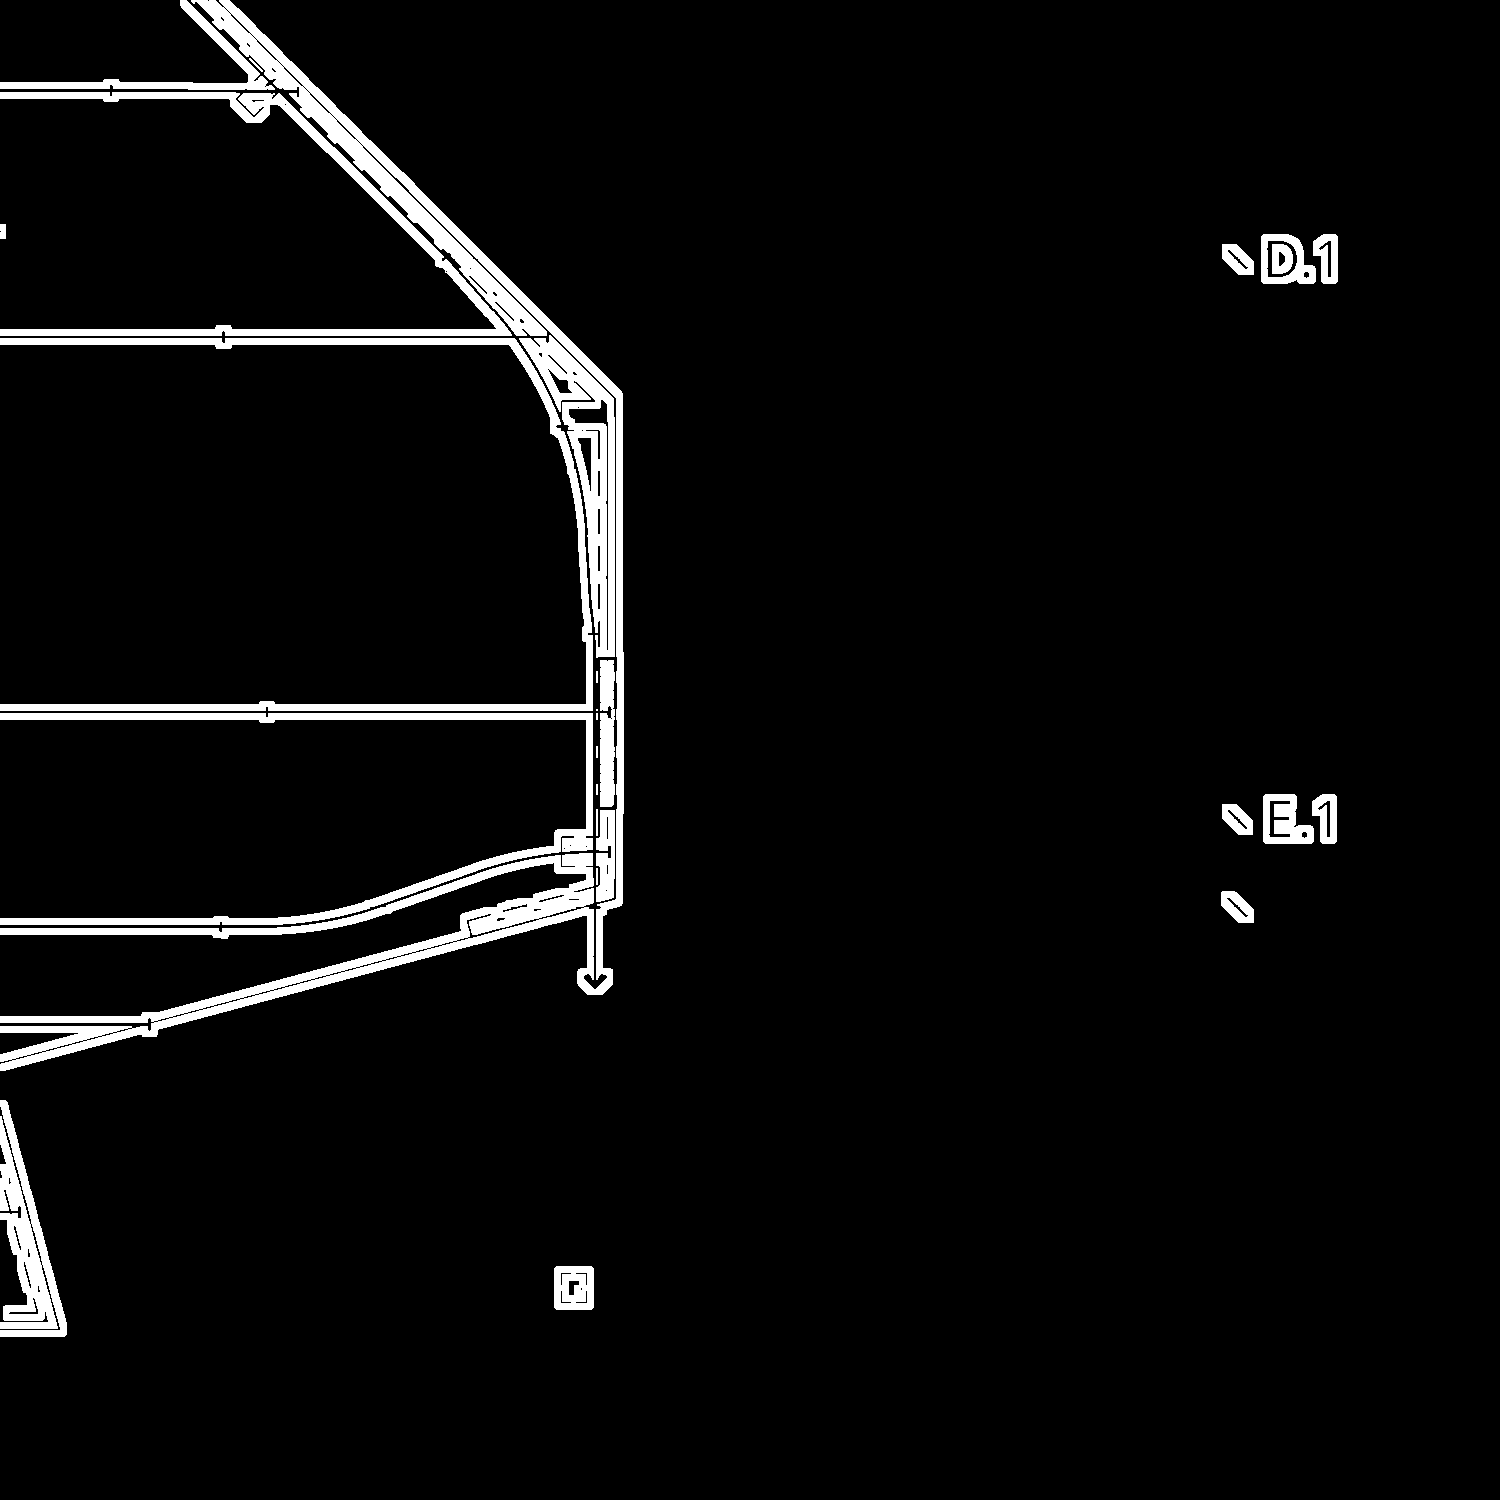

In [2]:
gray = cv2.cvtColor(tile, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((2, 2), np.uint8)
erode = cv2.erode(thresh, kernel)

bw = cv2.adaptiveThreshold(
    erode, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV,
    15, 3
)

Image.fromarray(bw)

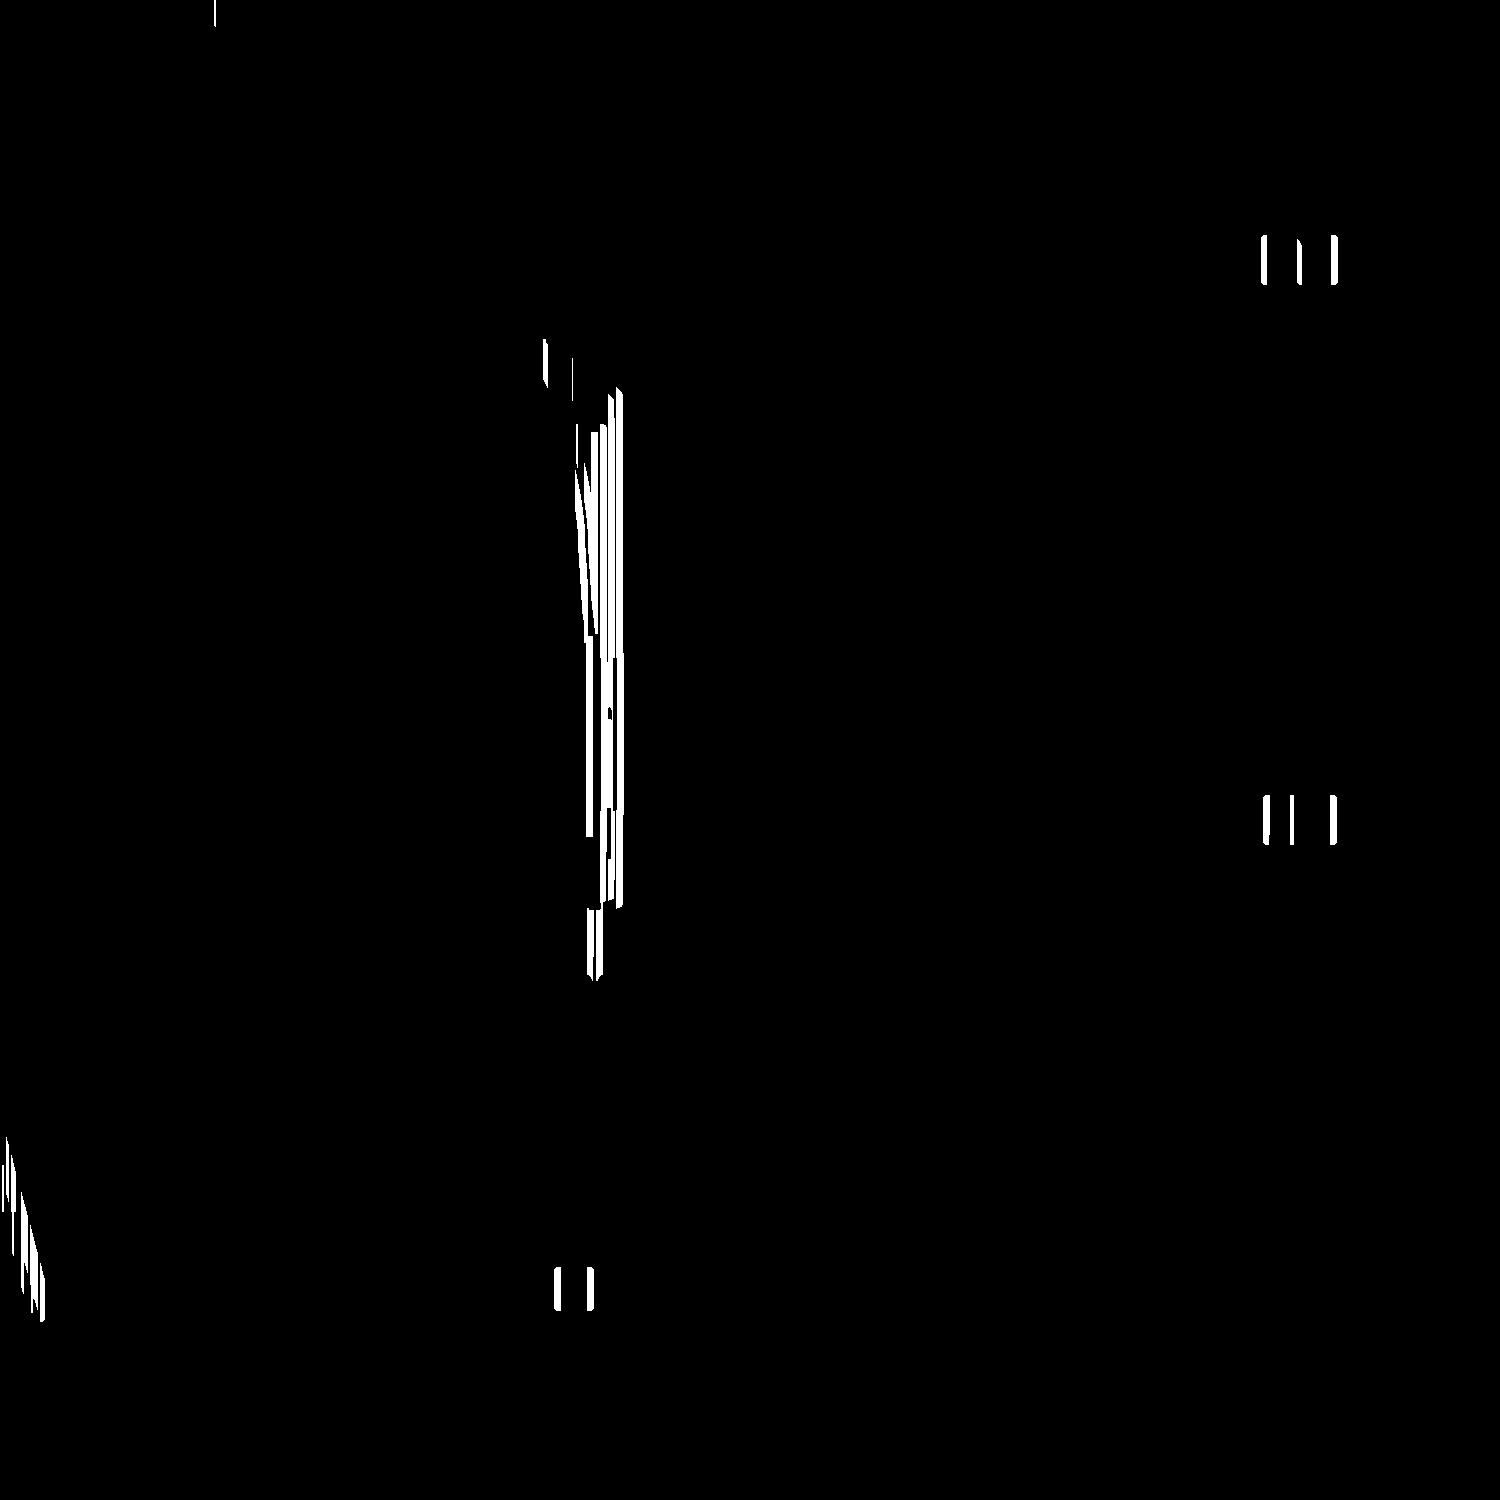

In [3]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 40))
vertical = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)
vertical = cv2.morphologyEx(vertical, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5)))

Image.fromarray(vertical)

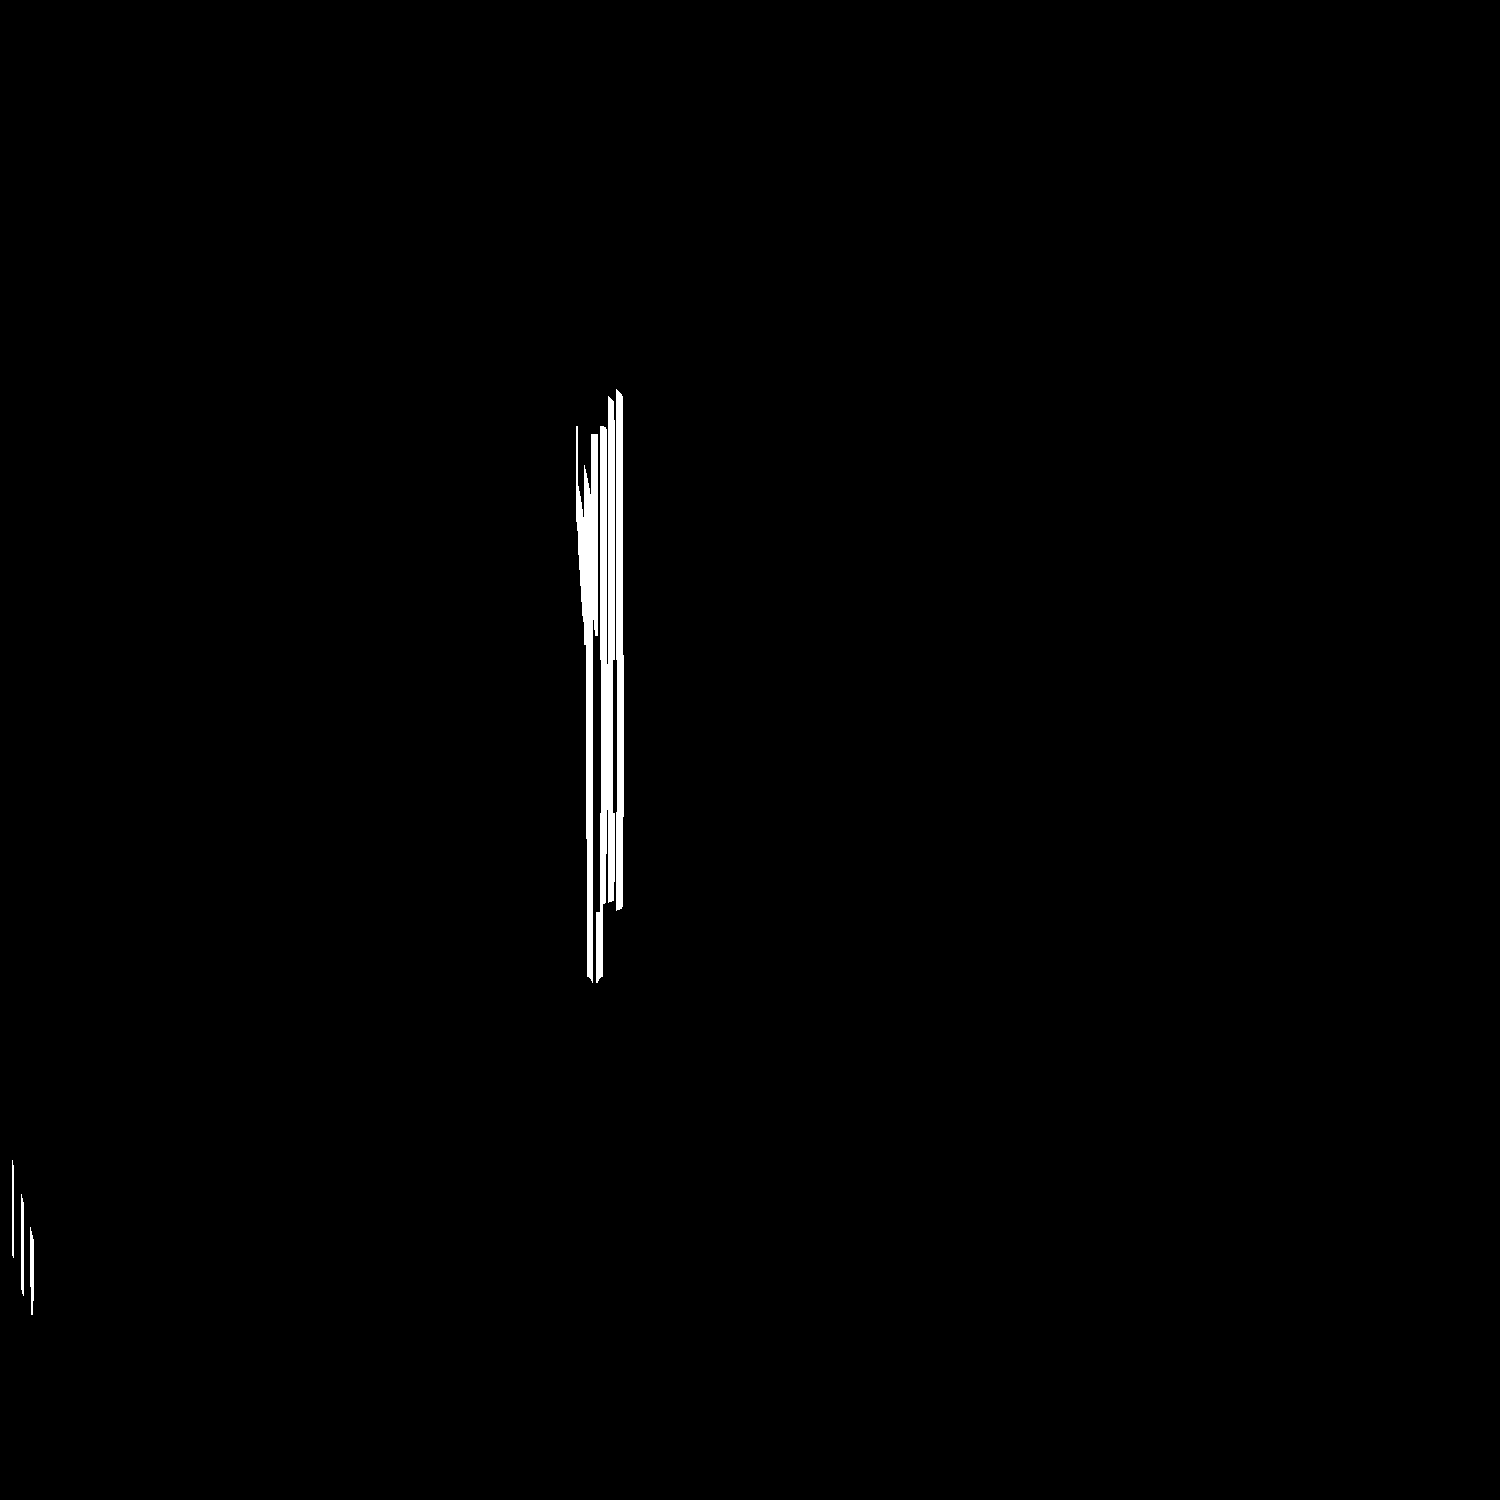

In [4]:
bridge_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 100))
vertical = cv2.morphologyEx(vertical, cv2.MORPH_CLOSE, bridge_kernel)
extract_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60))
vertical = cv2.morphologyEx(vertical, cv2.MORPH_OPEN, extract_kernel)

Image.fromarray(vertical)

In [5]:
# kernel = np.ones((5, 5), np.uint8)
# vertical = cv2.dilate(vertical, kernel)
# vertical = cv2.erode(vertical, kernel, iterations=3)
#
# Image.fromarray(vertical)

3


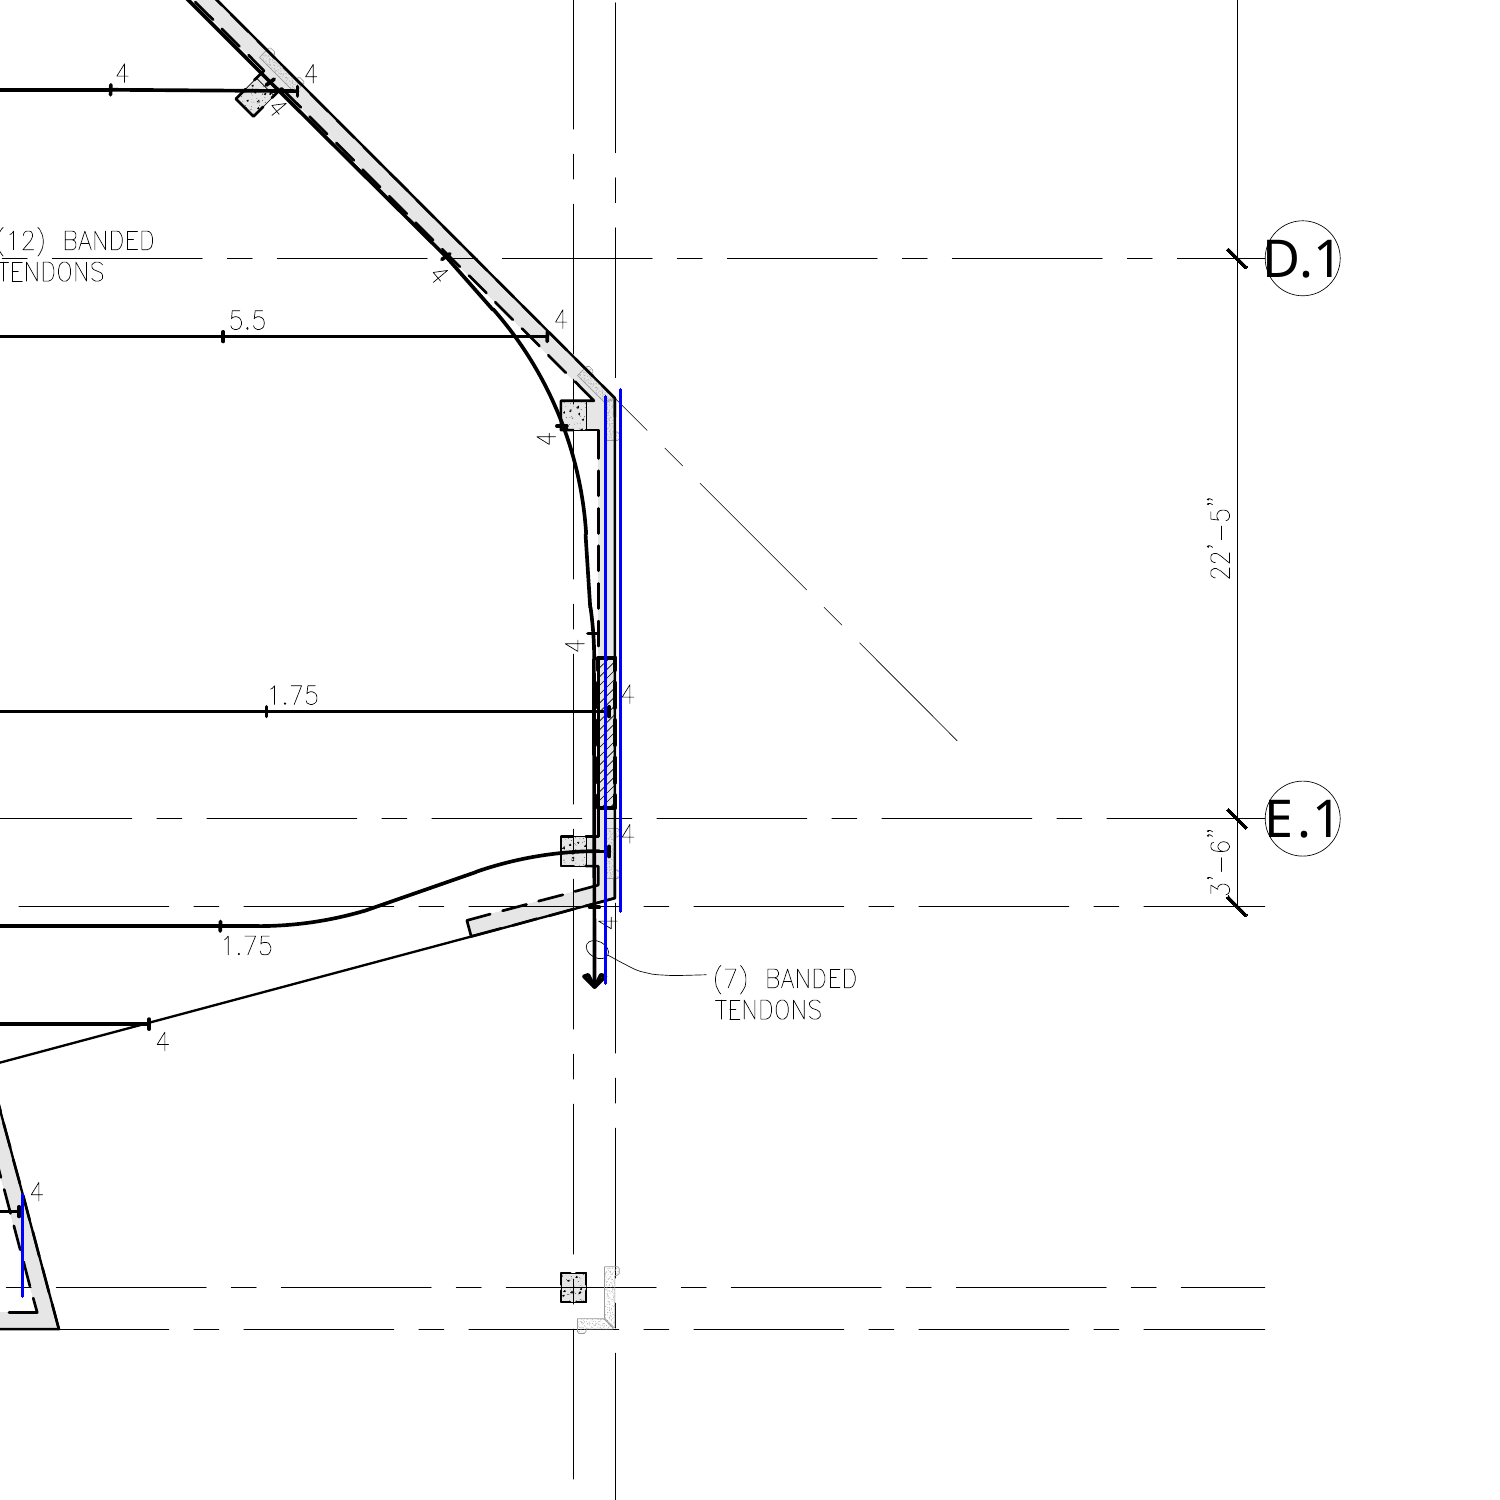

In [6]:
contours, _ = cv2.findContours(vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = tile.copy()

final_lines = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    if h > 100 and w < 20:
        # cv2.drawContours(image_copy, [cnt], 0, (0, 255, 0), 2)
        final_lines.append((x + w//2, y, x + w//2, y + h))

print(len(final_lines))
if final_lines is not None:
    for l in final_lines:
        x1, y1, x2, y2 = l
        cv2.line(image_copy, (x1, y1), (x2, y2), (0, 0, 255), 2)

Image.fromarray(image_copy)